### Movie Reviews using the Functional API

This notebook modifies the 'Keras_imdb_1_Dense_Sequential' to use the Functional API for the model building portion of the notebook. The data preparation is the same.


In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models

In [2]:
(train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

In [3]:
print('Size of training and test data:', train_labels.shape, test_labels.shape)

Size of training and test data: (25000,) (25000,)


In [4]:
# prepare data

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [5]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Functional API

The next few code blocks show how to build the model in the original notebook, but use the Functional API. The steps are as follows:

1. define the inputs
2. add a dense layer
3. add another dense layer
4. define the output layer
5. put all the layers together in a model

Each step is placed in a separate code chunk for illustration purposes. Normally, all steps could be in one chunk.

In [6]:
# 1. define the inputs
# we don't care about the number of samples
# we specify that each sample has 10000 input features

inputs = keras.Input(shape=(10000,))

In [7]:
# 2. add a dense layer
# Let x be the input layer plus a dense layer of 16 units

dense = layers.Dense(16, activation='relu')
x = dense(inputs)

In [8]:
# 3. add another dense layer
# dense is another layer added to (x)

dense = layers.Dense(16, activation='relu')(x)

In [9]:
# 4. define the outputs
# outputs is the layers so far (x), plus a final Dense layer of one unit

outputs = layers.Dense(1)(x)

In [10]:
# 5. put it all together in a model

model = keras.Model(inputs=inputs, outputs=outputs, name='functional_model')

### Continue as usual

The summary is displayed below. The compile, train, evaluation, and plots code chunks have exactly the same code as the previous notebook. 

In [11]:
model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [12]:
# compile
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [13]:
# create a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [14]:
# train

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 59ms/step - loss: 0.7785 - accuracy: 0.7027 - val_loss: 0.4357 - val_accuracy: 0.8229
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 0.3560 - accuracy: 0.8791 - val_loss: 0.4405 - val_accuracy: 0.8589
Epoch 3/20
30/30 [==============================] - 0s 15ms/step - loss: 0.2707 - accuracy: 0.9196 - val_loss: 0.4962 - val_accuracy: 0.8680
Epoch 4/20
30/30 [==============================] - 0s 16ms/step - loss: 0.2364 - accuracy: 0.9359 - val_loss: 0.5530 - val_accuracy: 0.8773
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1868 - accuracy: 0.9559 - val_loss: 0.5864 - val_accuracy: 0.8698
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1581 - accuracy: 0.9660 - val_loss: 0.6411 - val_accuracy: 0.8770
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1364 - accuracy: 0.9731 - val_loss: 0.6601 - val_accuracy: 0.8759
Epoch 8/20
30

In [15]:
# use sklearn evaluation

from sklearn.metrics import classification_report

pred = model.predict(x_test)
pred = [1.0 if p>= 0.5 else 0.0 for p in pred]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85     12500
         1.0       0.84      0.89      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [16]:
# use tf evaluation method

losses_and_metrics = model.evaluate(x_test, y_test, batch_size=128)
losses_and_metrics

196/196 [==============================] - 1s 3ms/step - loss: 1.1548 - accuracy: 0.8567


[1.154831051826477, 0.856719970703125]

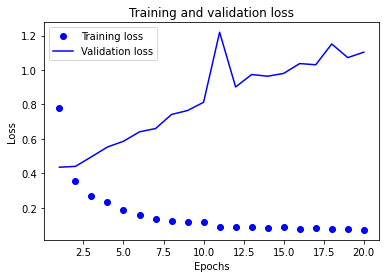

In [18]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The plot above shows that although the training loss decreased with every epoch, the validation set loss started increasing after about 4 epochs. This shows that the model was overtrained.

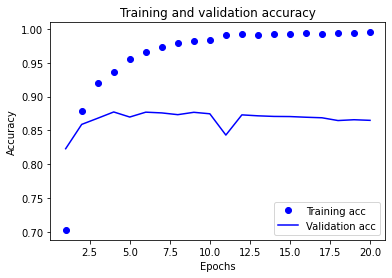

In [19]:
# plot the training and validation accuracy

plt.clf()   # clear

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Similarly, the accuracy plot above shows that training accuracy continued to improve over many epochs but validation accuracy decreased after about 4 epochs.


This model needs more work, but we stop here and show how you can save a model in the Functional API.

In [21]:
model.save('functional_model')  # or specify a path

INFO:tensorflow:Assets written to: functional_model/assets


Now delete the model from working memory, just to show that it can be loaded. 

In [22]:
del model

In [23]:
model = keras.models.load_model('functional_model')

In [25]:
# just to show it really is the same model, print the summary

model.summary()

Model: "functional_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________
